<a href="https://colab.research.google.com/github/bmines/Projects/blob/master/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("/content/Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [3]:
data = data.drop("country", axis = 1)

In [4]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
standard = normalize(x_scaled)
print(standard)

[[ 0.39990801 -0.35245513  0.08641644 ... -0.50133305  0.58920541
  -0.21030008]
 [-0.36598508 -0.32572258 -0.06588097 ...  0.43994792 -0.58398341
  -0.32977311]
 [-0.16396892 -0.05957081 -0.5805973  ...  0.40291563 -0.02308054
  -0.27968468]
 ...
 [-0.16908736  0.51332894  0.00403163 ...  0.13032205 -0.30028739
  -0.28963655]
 [ 0.19111871 -0.17324423 -0.25456184 ... -0.1468852   0.4862792
  -0.27181578]
 [ 0.35078073 -0.04730173 -0.1063448  ... -0.65842251  0.51112717
  -0.19806478]]


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(standard)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ["P1", "P2"]
x_principal

,P1,P2
0,0.931544,-0.052894
1,-0.431395,-0.144087
2,0.133125,-0.373318
3,0.876380,0.190816
4,-0.725008,0.325375
...,...,...
162,0.581214,0.472084
163,0.109780,-0.449313
164,-0.191270,0.771986
165,0.816545,-0.233148


In [6]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "complete")
clust_labels = model.fit_predict(x_principal)

In [7]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,0
2,1
3,1
4,2
...,...
162,3
163,1
164,2
165,1


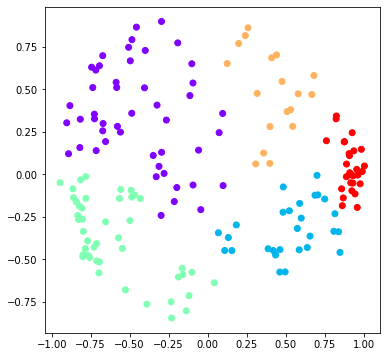

In [8]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(x_principal['P1'], x_principal['P2'], 
           c = ac5.fit_predict(x_principal), cmap ='rainbow')
plt.show()

In [9]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(x_principal)

KMeans(n_clusters=5, random_state=0)

In [10]:
labels = pd.DataFrame(kmeans.labels_)
df=pd.DataFrame(x_principal)
df2 =  pd.concat([labels, x_principal], axis=1)
df2.columns = ["labels", "P1", "P2"]
df2

,labels,P1,P2
0,2,0.931544,-0.052894
1,3,-0.431395,-0.144087
2,0,0.133125,-0.373318
3,2,0.876380,0.190816
4,1,-0.725008,0.325375
...,...,...,...
162,4,0.581214,0.472084
163,0,0.109780,-0.449313
164,1,-0.191270,0.771986
165,2,0.816545,-0.233148


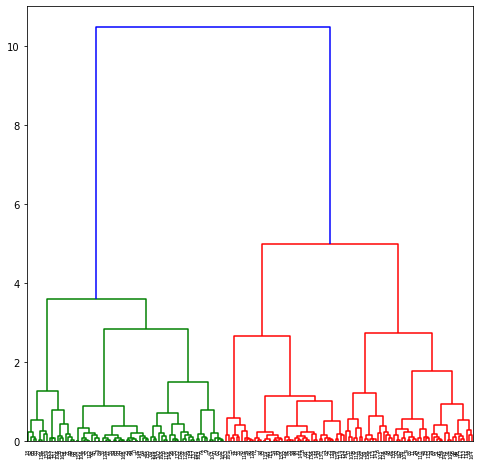

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 8))
dend = shc.dendrogram(shc.linkage(x_principal, method = "ward"))

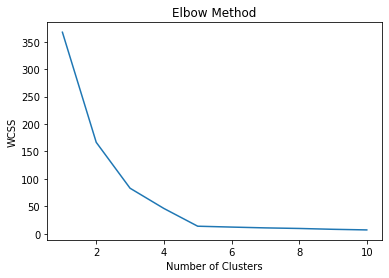

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss);
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

n = 5

In [17]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[ 0.04603682 -0.4734897 ]
 [-0.57521482  0.45929565]
 [ 0.3026778   0.45685176]
 [-0.67228956 -0.25523856]
 [ 0.81860516 -0.06981397]]


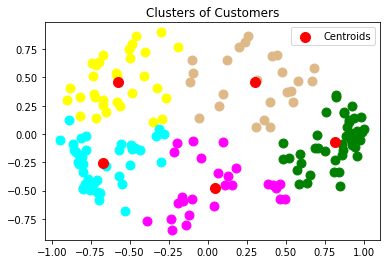

In [19]:
plt.scatter(df2["P1"][df2.labels == 0],
            df2["P2"][df2.labels == 0],s=80,c='magenta')
plt.scatter(df2["P1"][df2.labels == 1],
           df2["P2"][df2.labels == 1],s=80,c='yellow')
plt.scatter(df2["P1"][df2.labels == 2],
           df2["P2"][df2.labels == 2],s=80,c='green')
plt.scatter(df2["P1"][df2.labels == 3], 
           df2["P2"][df2.labels == 3],s=80,c='cyan')
plt.scatter(df2["P1"][df2.labels == 4], 
           df2["P2"][df2.labels == 4],s=80,c='burlywood')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()